# Data Set 1 for the BCI Competition IV

[http://bbci.de/competition/iv/desc_1.html](http://bbci.de/competition/iv/desc_1.html)

Data sets provided by the [Berlin BCI](http://www.bbci.de/) group: Berlin Institute of Technology ([Machine Learning Laboratory](http://ml.cs.tu-berlin.de/en/index.html)) and Fraunhofer FIRST ([Intelligent Data Analysis Group](http://www.first.fhg.de/ida/)) ([Klaus-Robert Müller](http://ml.cs.tu-berlin.de/en/klaus/index.html), [Benjamin Blankertz](http://ml.cs.tu-berlin.de/~blanker), Carmen Vidaurre, [Guido Nolte](http://ida.first.fraunhofer.de/~nolte/)), and Campus Benjamin Franklin of the Charité - University Medicine Berlin, Department of Neurology, Neurophysics Group (Gabriel Curio)


### The Thrill

Most demonstrations of algorithms on BCI data are evaluating classification of EEG trials, i.e., windowed EEG signals for fixed length, where each trial corresponds to a specific mental state. But in BCI applications with asynchronous feedback one is faced with the problem that the classifier has to be applied continuously to the incoming EEG without having cues of when the subject is switching her/his intention. This data set poses the challenge of applying a classifier to continuous EEG for which no cue information is given. 
 Another issue that is addressed in this data set is that the evaluation data contains periods in which the user has no control intention. During those intervals the classifier is supposed to return 0 (no affiliation to one of the target classes).

### Experimental Setup

These data sets were recorded from healthy subjects. In the whole session motor imagery was performed without feedback. For each subject two classes of motor imagery were selected from the three classes left hand, right hand, and foot (side chosen by the subject; optionally also both feet). 

**Calibration data:** In the first two runs, arrows pointing left, right, or down were presented as visual cues on a computer screen. Cues were displayed for a period of 4s during which the subject was instructed to perform the cued motor imagery task. These periods were interleaved with 2s of blank screen and 2s with a fixation cross shown in the center of the screen. The fixation cross was superimposed on the cues, i.e. it was shown for 6s. These data sets are provided with complete marker information. 

**Evaluation data:** Then 4 runs followed which are used for evaluating the submissions to the competitions. Here, the motor imagery tasks were cued by soft acoustic stimuli (words left, right, and foot) for periods of varying length between 1.5 and 8 seconds. The end of the motor imagery period was indicated by the word stop. Intermitting periods had also a varying duration of 1.5 to 8s. Note that in the evaluation data, there are not necessarily equally many trials from each condition. 

**Special Feature:** Some of the data sets were artificially generated. The idea is to have a means for generating artifical EEG signals with specified properties that is such realistic that it can be used to evaluate and compare analysis techniques. The outcome of the competition will show whether the applied methods perform comparably on artifical and real data. The only information we provide is that there is at least one real and at least one artificial data set, while the true distribution remains undisclosed until the submission deadline. For competition purpose, only results for the real data set(s) are considered. The functions for generating artificial data were provided by [Guido Nolte](http://ida.first.fraunhofer.de/~nolte/) and Carmen Vidaurre.

### Format of the Data

Given are continuous signals of 59 EEG channels and, for the calibration data, markers that indicate the time points of cue presentation and the corresponding target classes.

Data are provided in **Matlab** format (*.mat) containing variables:

- cnt: the continuous EEG signals, size [time x channels]. The array is stored in datatype INT16. To convert it to uV values, use cnt= 0.1*double(cnt); in Matlab.
- mrk: structure of target cue information with fields (the file of evaluation data does  contain this variable)

    not

    - pos: vector of positions of the cue in the EEG signals given in unit , length #cues

        sample

    - y: vector of target classes (-1 for class one or 1 for class two), length #cues
- nfo: structure providing additional information with fields
    - fs: sampling rate,
    - clab: cell array of channel labels,
    - classes: cell array of the names of the motor imagery classes,
    - xpos: x-position of electrodes in a 2d-projection,
    - ypos: y-position of electrodes in a 2d-projection.

As alternative, data is also provided in zipped **ASC II** format:

- _cnt.txt: the continuous EEG signals, where each row holds the values for all channels at a specific time point
- _mrk.txt: target cue information, each row represents one cue where the first value defines the time point (given in unit ), and the second value the target class (-1 for class one or 1 for class two). For evaluation data  *_mrk.txt file is provided.

    sample

    no

- _nfo.txt: contains other information as described for the matlab format.

### Requirements and Evaluation

Please provide an ASC II file (named 'Result_BCIC_IV_ds1.txt') containing classifier outputs (real number between -1 and 1) for each sample point of the evaluation signals, one value per line. The submissions are evaluated in view of a one dimensional cursor control application with range from -1 to 1. The mental state of class one is used to position the cursor at -1, and the mental state of class two is used to position the cursor near 1. In the absense of those mental states (intermitting intervals) the cursor should be at position 0. Note that it is unknown to the competitors at what intervals the subject is in a defined mental state. Competitiors submit classifier outputs for all time points. The evaluation function calculates the squared error with respect to the target vector that is -1 for class one, 1 for class two, and 0 otherwise, averaged across time points. In the averaging we will ignore time points during transient periods (1s starting from each cue). For competition purpose, only results for the real data set(s) are considered, but results for artifical data are also reported for comparison.
 Optionally, please report which of the data sets you think to be artificially generated. 
 You also have to provide a description of the used algorithm (ASC II, HTML or PDF format) for publication at the results web page.

### Technical Information

The recording was made using BrainAmp MR plus amplifiers and a Ag/AgCl electrode cap. Signals from 59 EEG positions were measured that were most densely distributed over sensorimotor areas. Signals were band-pass filtered between 0.05 and 200 Hz and then digitized at 1000 Hz with 16 bit (0.1 uV) accuracy. We provide also a version of the data that is downsampled at 100 Hz (first low-pass filtering the original data (Chebyshev Type II filter of order 10 with stopband ripple 50dB down and stopband edge frequency 49Hz) and then calculating the mean of blocks of 10 samples).

[ [BCI Competition IV](http://www.bbci.de/competition/iv) ]

In [26]:
import numpy as np
from scipy.io import loadmat 

dat = loadmat('BCICIV_calib_ds1d.mat', struct_as_record=True)

In [27]:
dat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'mrk', 'cnt', 'nfo'])

In [28]:
sfreq = dat['nfo']['fs'][0][0][0][0]
EEGdata   = dat['cnt'].T
nchannels, nsamples = EEGdata.shape

chan_names = [s[0] for s in dat['nfo']['clab'][0][0][0]]

event_onsets  = dat['mrk'][0][0][0]
event_codes   = dat['mrk'][0][0][1]

labels = np.zeros((1, nsamples), int)
labels[0, event_onsets] = event_codes

cl_lab = [s[0] for s in dat['nfo']['classes'][0][0][0]]
cl1    = cl_lab[0]
cl2    = cl_lab[1]

# digitized electrode positions 
xpos = dat['nfo']['xpos']
ypos = dat['nfo']['ypos']

nclasses = len(cl_lab)
nevents = len(event_onsets)

# Print some information
print('Shape of EEG:', EEGdata.shape)
print('Sample rate:', sfreq)
print('Number of channels:', nchannels)
print('Channel names:', chan_names)
print('Number of events:', len(event_onsets))
print('Event codes:', np.unique(event_codes))
print('Class labels:', cl_lab)
print('Number of classes:', nclasses)

In [30]:
# Dictionary to store the trials in, each class gets an entry
trials = {}

# The time window to extract for each trial, here 0.5 -- 2.5 seconds
win = np.arange(int(0.5*sfreq), int(2.5*sfreq))

# Length of the time window
nsamples = len(win)

# Loop over the classes (right, foot)
for cl, code in zip(cl_lab, np.unique(event_codes)):
    
    # Extract the onsets for the class
    cl_onsets = event_onsets[event_codes == code]
    
    # Allocate memory for the trials
    trials[cl] = np.zeros((nchannels, nsamples, len(cl_onsets)))
    
    # Extract each trial
    for i, onset in enumerate(cl_onsets):
        trials[cl][:,:,i] = EEGdata[:, win+onset]
        
# the dimensionality of the data (channels x time x trials)
print('Shape of trials[cl1]:', trials[cl1].shape)
print('Shape of trials[cl2]:', trials[cl2].shape)

Shape of trials[cl1]: (59, 200, 100)
Shape of trials[cl2]: (59, 200, 100)


In [19]:
%qtconsole

In [35]:
left_hand  = np.rollaxis(trials[cl1], 2, 0)  
right_hand = np.rollaxis(trials[cl2], 2, 0)  

In [36]:
left_hand.shape

(100, 59, 200)

In [37]:
data = np.concatenate([left_hand, right_hand])

In [38]:
# create labels 
Y = np.concatenate([-np.ones(left_hand.shape[0]),
                     np.ones(right_hand.shape[0])])

## Create MNE structure

In [39]:
import mne

We need the following information to create MNE structure:
   - data ([ndarray]): [trials x chans x samples]
   - y ([ndarray]):    [class label array  [1, labels]]
   - sfreq ([int]):    [sampling frequency]
   - event_id ([dict]): [{1 :'pos', -1 : 'neg'} - class labels id]
   - chan_names ([list]): [channel names in a list of strings]                      

In [40]:
n_channels = 59

# Initialize an info structure
info = mne.create_info(
        ch_names = chan_names,
        ch_types = ['eeg']*nchannels,
        sfreq    = sfreq )  

print('Event created :', info)    

Event created : <Info | 7 non-empty values
 bads: []
 ch_names: AF3, AF4, F5, F3, F1, Fz, F2, F4, F6, FC5, FC3, FC1, FCz, FC2, ...
 chs: 59 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 50.0 Hz
 meas_date: unspecified
 nchan: 59
 projs: []
 sfreq: 100.0 Hz
>


In [41]:
# digitized electrode positions 
xpos = dat['nfo']['xpos'][0][0]  
ypos = dat['nfo']['ypos'][0][0] 

In [42]:
layout_pos = np.concatenate([xpos, ypos], axis = 1)
layout_pos

array([[-0.20109028,  0.68656518],
       [ 0.20109028,  0.68656518],
       [-0.48547489,  0.52547424],
       [-0.32894737,  0.46520183],
       [-0.16535231,  0.43208641],
       [ 0.        ,  0.421549  ],
       [ 0.16535231,  0.43208641],
       [ 0.32894737,  0.46520183],
       [ 0.48547489,  0.52547424],
       [-0.60591541,  0.27165704],
       [-0.39919579,  0.23384348],
       [-0.19765935,  0.21394494],
       [ 0.        ,  0.20773757],
       [ 0.19765935,  0.21394494],
       [ 0.39919579,  0.23384348],
       [ 0.60591541,  0.27165704],
       [-0.74834683,  0.15177169],
       [-0.52472976,  0.12553103],
       [-0.30963911,  0.11086096],
       [-0.10226303,  0.10426648],
       [ 0.10226303,  0.10426648],
       [ 0.30963911,  0.11086096],
       [ 0.52472976,  0.12553103],
       [ 0.74834683,  0.15177169],
       [-0.87719298,  0.        ],
       [-0.64569058,  0.        ],
       [-0.421549  ,  0.        ],
       [-0.20773757,  0.        ],
       [ 0.        ,

In [43]:
layout = mne.channels.generate_2d_layout(
    xy = layout_pos,
    ch_names=chan_names,
    name ='EEG custom layout',
    )

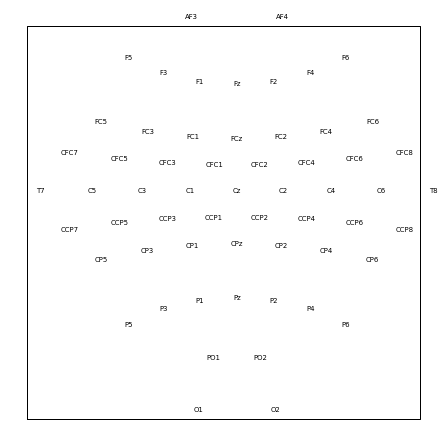

In [44]:
layout.plot();

### MNE events
the events array should contain the following information
[sample onsets, zeros, labels]

In [45]:
event_id = dict(left = -1, right = 1)

In [53]:
# Create an event matrix: events with alternating event codes
eventLength = Y.shape[0]
ev = [i*sfreq*3 for i in range(eventLength)]

events = np.column_stack((np.array(ev,  dtype = int),
                          np.zeros(eventLength,  dtype = int),
                          np.array(Y,  dtype = int)))

In [55]:
events

array([[    0,     0,    -1],
       [  300,     0,    -1],
       [  600,     0,    -1],
       [  900,     0,    -1],
       [ 1200,     0,    -1],
       [ 1500,     0,    -1],
       [ 1800,     0,    -1],
       [ 2100,     0,    -1],
       [ 2400,     0,    -1],
       [ 2700,     0,    -1],
       [ 3000,     0,    -1],
       [ 3300,     0,    -1],
       [ 3600,     0,    -1],
       [ 3900,     0,    -1],
       [ 4200,     0,    -1],
       [ 4500,     0,    -1],
       [ 4800,     0,    -1],
       [ 5100,     0,    -1],
       [ 5400,     0,    -1],
       [ 5700,     0,    -1],
       [ 6000,     0,    -1],
       [ 6300,     0,    -1],
       [ 6600,     0,    -1],
       [ 6900,     0,    -1],
       [ 7200,     0,    -1],
       [ 7500,     0,    -1],
       [ 7800,     0,    -1],
       [ 8100,     0,    -1],
       [ 8400,     0,    -1],
       [ 8700,     0,    -1],
       [ 9000,     0,    -1],
       [ 9300,     0,    -1],
       [ 9600,     0,    -1],
       [ 9

In [56]:
# The time window (in samples) to extract for each trial, here 0.5 -- 2.5 seconds
tmin = 0.5                

# Create the :class:`mne.EpochsArray` object
epochs = mne.EpochsArray(data, info, events, tmin, event_id)

Not setting metadata
Not setting metadata
200 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


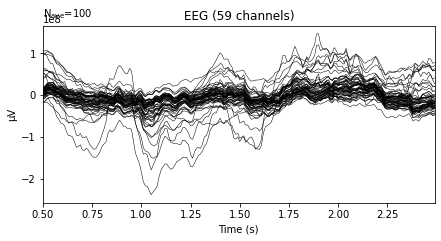

In [57]:
epochs['left'].average().plot();

    Using multitaper spectrum estimation with 7 DPSS windows


C:\Users\user\AppData\Local\Temp/ipykernel_1980/2204970765.py:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  epochs.plot_psd();


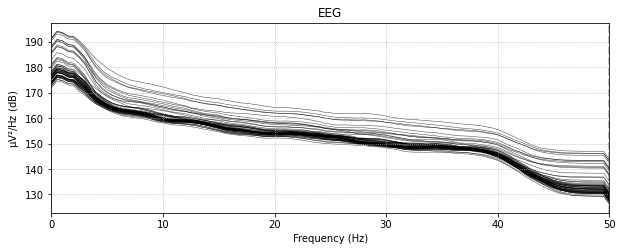

In [58]:
epochs.plot_psd();

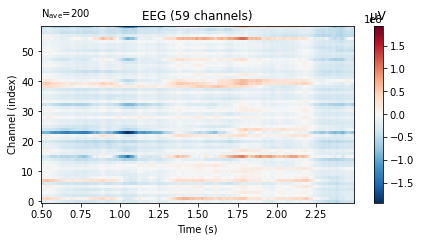

In [59]:
epochs.average().plot_image();

In [60]:
epochs.filter(l_freq=8, h_freq=32)

Setting up band-pass filter from 8 - 32 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 32.00 Hz
- Upper transition bandwidth: 8.00 Hz (-6 dB cutoff frequency: 36.00 Hz)
- Filter length: 165 samples (1.650 sec)



<EpochsArray |  200 events (all good), 0.5 - 2.49 sec, baseline off, ~18.1 MB, data loaded,
 'left': 100
 'right': 100>

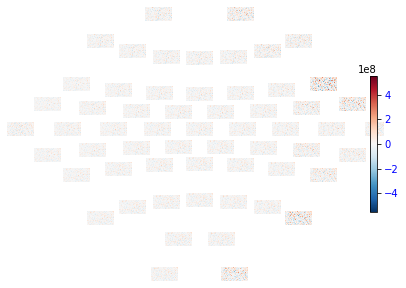

In [61]:
epochs.plot_topo_image(layout=layout, 
                       fig_facecolor='w', font_color='b');